# Nonlinear Time series analysis

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.signal import argrelextrema
from time_series_analysis_functions import *
from scipy.fft import fft, fftfreq
from scipy.optimize import curve_fit

In [46]:
%matplotlib inline

In [47]:
dt=0.1 #sample time
passo_int=0.001

#lenght of the time series (we consider x as the time series observed)
N=2000*int(dt/passo_int)

x, y, z = Rossler_attractor(dt=passo_int,N=N)


#temporal series
xs=x[::int(dt/passo_int)]


#temporal series with noise
xs1=noise_signal(xs,1)
xs10=noise_signal(xs,10)
xs100=noise_signal(xs,100)
xs1000=noise_signal(xs,1000)

xs_noise=[xs1,xs10,xs100,xs1000]
SNR=[1,10,100,1000]

#stochastic series 
xs_stoc= np.random.normal(0, 1, size=2000)
xs=xs_stoc
# embedding parameters
m=3
tau=17
M=len(xs)-(m-1)*tau

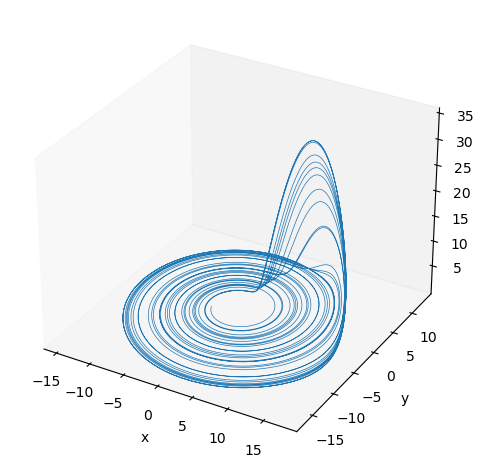

In [48]:
fig = plt.figure(1)
ax = plt.axes(projection='3d')
ax.plot(x, y, z, lw=0.5)
ax.set_xlabel('x', fontsize=10)
ax.set_ylabel('y', fontsize=10)
ax.set_zlabel('z', fontsize=10)
ax.grid(False)
plt.tick_params(labelsize=10)
plt.tight_layout()
#ax.set_title('Rossler Attractor', fontsize=15)
plt.savefig("Rossler_attractor.png",dpi=300)
plt.show()

## Phase reconstruction

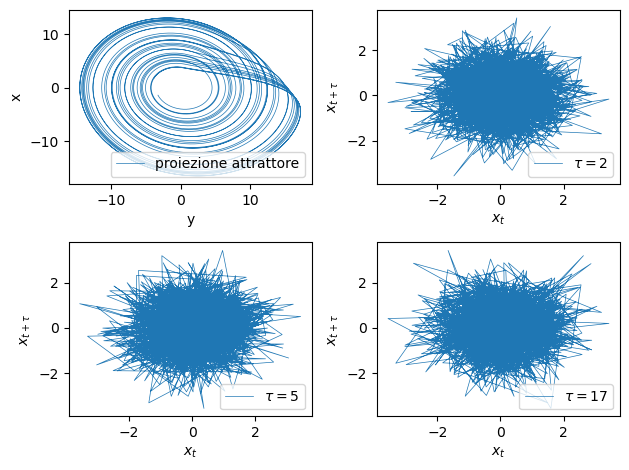

In [49]:
plt.figure(2)

plt.subplot(2,2,1)
plt.errorbar(x,y,lw=0.5,label='proiezione attrattore')   
plt.ylabel(r'x')
plt.xlabel(r'y')
plt.legend(loc='lower right')
#plt.tight_layout()

tau_list=[2,5,17]
i=1
for t_i in tau_list:
    X_matr=embedding(xs,m,t_i)
    plt.subplot(2,2,i+1)
    plt.errorbar(X_matr[:,0],X_matr[:,1],lw=0.5,label=r'$\tau=$'+str(t_i))    
    plt.ylabel(r'$x_{t+\tau}$')
    plt.xlabel(r'$x_{t}$')
    plt.legend(loc='lower right')
    #plt.tight_layout()
    i+=1
plt.tight_layout()
plt.savefig("phase_reconstruction_varing_tau.png",dpi=300)
plt.show()

### Phase reconstruction additive noise

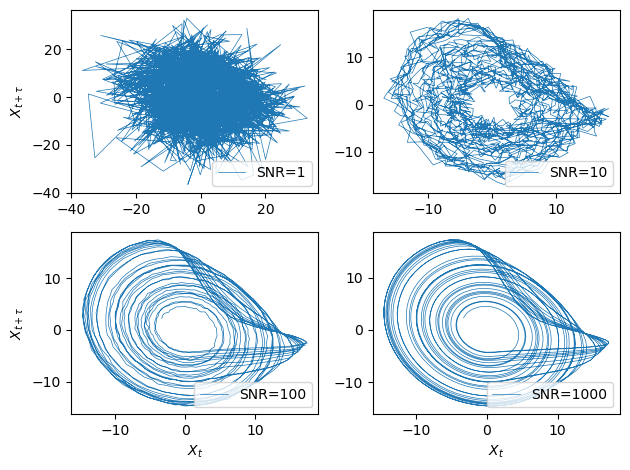

In [50]:
plt.figure(3)
i=0
for xs_i in xs_noise:
    X_matr=embedding(xs_i,m,tau)
    plt.subplot(2,2,i+1)
    plt.errorbar(X_matr[:,0],X_matr[:,1],lw=0.5,label='SNR='+str(SNR[i]))
    if (i==0 or i==2):
        plt.ylabel(r'$X_{t+\tau}$')
    if (i==2 or i==3):
        plt.xlabel(r'$X_{t}$')
    plt.legend(loc='lower right')
    plt.tight_layout()
    i+=1
plt.tight_layout()
plt.savefig("phase_reconstruction_noise_subplot.png",dpi=300)
plt.show()

## Mutual information

taumin (array([ 23,  53,  84, 140, 183, 208, 236], dtype=int64),)


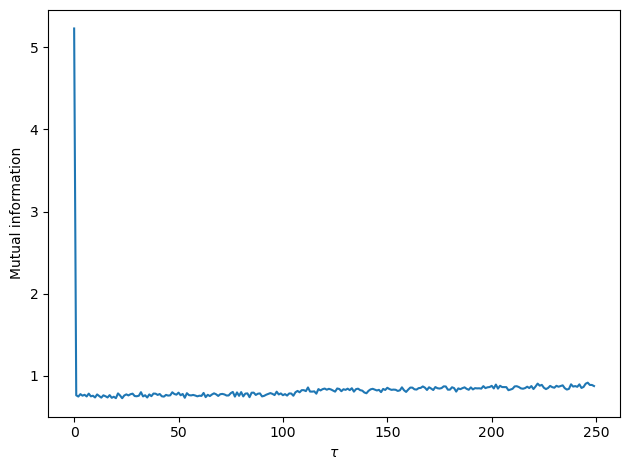

In [51]:
#mutual information
I,tau_arr=time_mi(xs,maxtau=250)
tau_min=argrelextrema(I, np.less, order=20)
print('taumin',tau_min)

fig = plt.figure(4)
plt.errorbar(tau_arr,I)
plt.ylabel(r'Mutual information')   
plt.xlabel(r'$\tau$')
plt.tight_layout()
plt.savefig("mutual_information.png",dpi=300)
plt.show()

## Correlation to determine best time delay

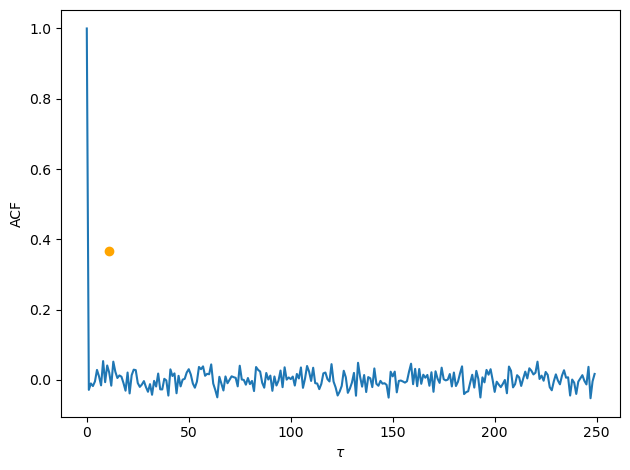

In [52]:
#correlation
corr,tau_arr=corr_arr(xs, maxtau=250)


fig = plt.figure(5)
plt.errorbar(tau_arr,corr)
plt.errorbar(11,1/np.exp(1),color='orange',marker='o')

plt.ylabel(r'ACF')   
plt.xlabel(r'$\tau$')
plt.tight_layout()
plt.savefig("ACF.png",dpi=300)
plt.show()

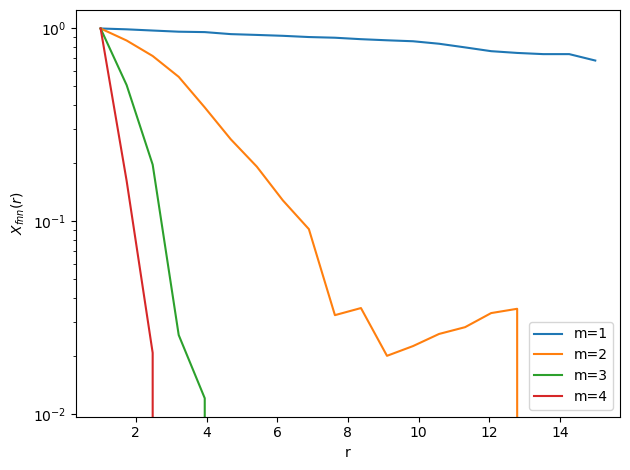

In [53]:
R=20
fnn_arr=np.zeros(R)

r_arr=np.linspace(1,15,R)
m=[1,2,3,4]
plt.figure(6) 
for i in range(len(m)): 
    k=0
    for r in r_arr: #range(1,R,1):
        X_fnn=fnn(m[i],xs,r,tau=17,window=0)
        fnn_arr[k]=X_fnn
        r_arr[k]=r
        k+=1
    plt.errorbar(r_arr,fnn_arr,label='m='+str(m[i]))
        
plt.xlabel('r')
plt.ylabel(r'$X_{fnn}(r)$')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.savefig("false_nearest_neighbour.png",dpi=300)
plt.show() 


main freq 1.26
main period 0.7936507936507936


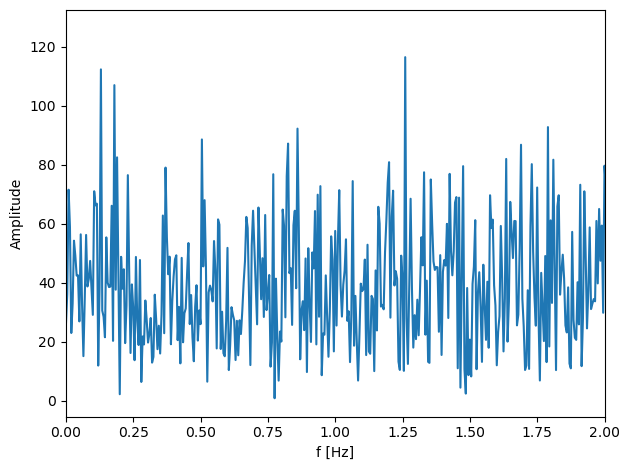

In [54]:
fft_result = np.fft.rfft(xs)
freq =np.linspace(0,1/(2*dt),len(fft_result))
plt.figure(7)
plt.plot(freq, np.abs(fft_result))
plt.xlabel('f [Hz]')
plt.ylabel("Amplitude")
plt.xlim(0, 2)
plt.tight_layout()
plt.savefig("fft.png",dpi=300)

main_freq=freq[np.argmax(fft_result)]

print('main freq',main_freq)
print('main period',1/main_freq)

plt.show()

## Largest Lyapunnov exponent

In [55]:
#embedding varing dimension m
X=embedding(xs,6,tau)
d6,t=mean_lyapunov_exp(X,max_l=500,window=7)

X=embedding(xs,5,tau)
d5,t=mean_lyapunov_exp(X,max_l=500,window=7)

X=embedding(xs,4,tau)
d4,t=mean_lyapunov_exp(X,max_l=500,window=7)

X=embedding(xs,3,tau)
d3,t=mean_lyapunov_exp(X,max_l=500,window=7)

X=embedding(xs,2,tau)
d2,t=mean_lyapunov_exp(X,max_l=500,window=7)

X=embedding(xs,1,tau)
d1,t=mean_lyapunov_exp(X,max_l=500,window=7)



## Fitting largest lyapunov exponent

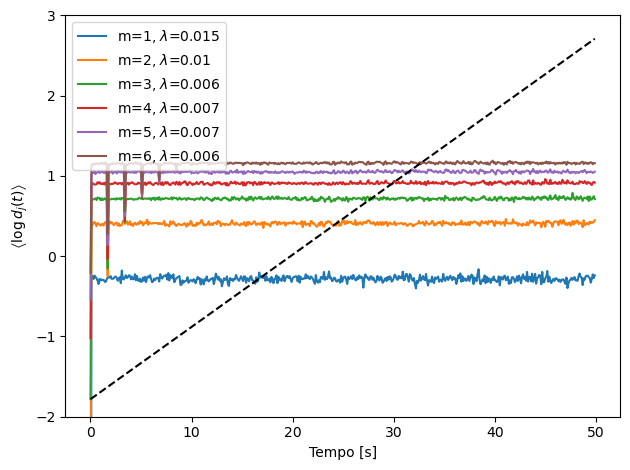

In [56]:
def fit(t, c, lyap):
    return (c+lyap*t)


d=[d1,d2,d3,d4,d5,d6]
m=[1,2,3,4,5,6]
pars=[]
covm=[]

i=0
plt.figure(8)
for d_i in d:
    t_fit=t[:-340]
    d_i_fit=d_i[:-340]
    if i==2:
        d_i_fit=d_i[:-310]
        t_fit=t[:-310]
    pars_i, covm_i =curve_fit(fit,dt*t_fit,d_i_fit, absolute_sigma=False)
    
    pars.append(pars_i)
    covm.append(covm_i)
    
    lyap=pars_i[1]
    plt.errorbar(dt*t,d_i,label=r'm='+str(m[i])+r', $\lambda$='+str(round(lyap,3)))
    i+=1

plt.errorbar(dt * t, d3[0] + dt * t * 0.09, linestyle='--',color='black')
plt.ylim(-2,3)
plt.xlabel('Tempo [s]')
plt.ylabel(r'$\left\langle \log{d_j(t)} \right\rangle$')
plt.tight_layout()
plt.legend()
plt.savefig("lyapunov_exp_fit.png",dpi=300)
plt.show()

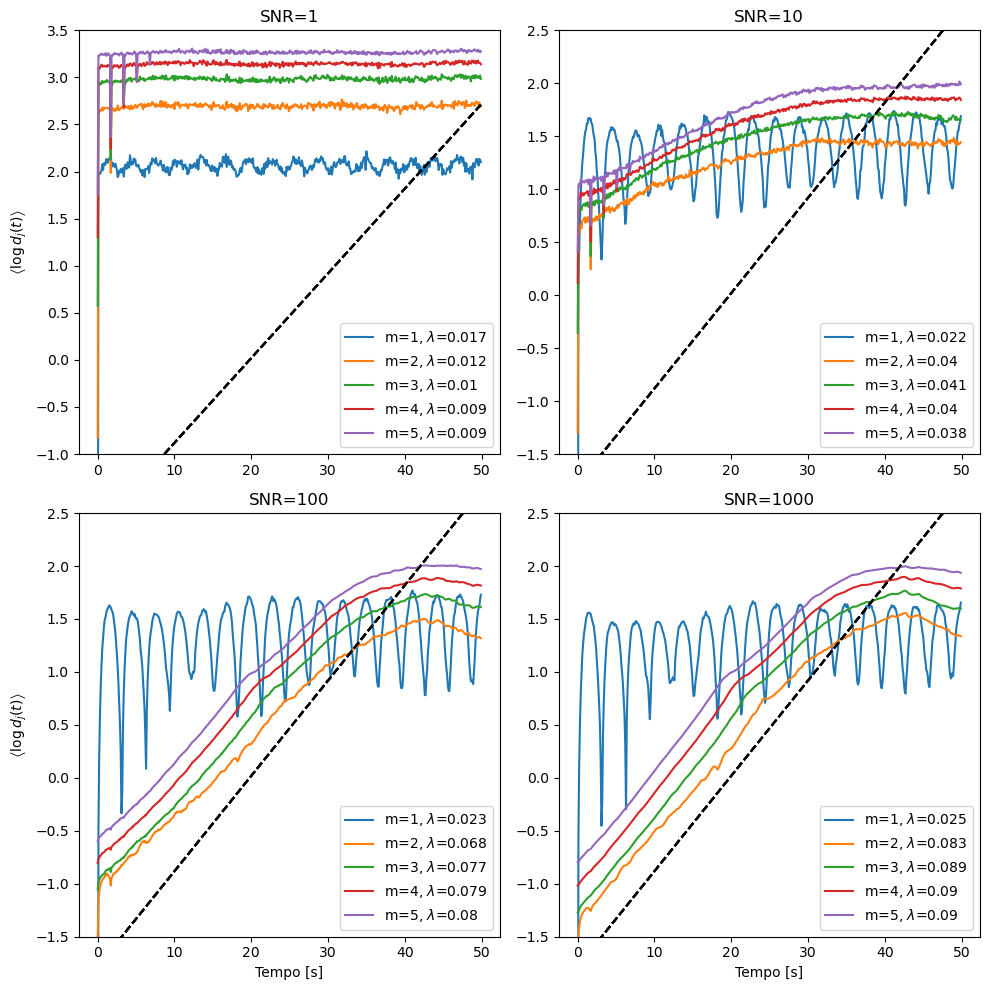

In [57]:
m=[1,2,3,4,5]

fig=plt.figure(8)
fig.set_size_inches(10, 10)
k=0
for xs_n in xs_noise:
    for i in range(len(m)):
        X=embedding(xs_n,m[i],tau)
        d_i,t_i=mean_lyapunov_exp(X,max_l=500,window=7)
        t_fit=t[:-340]
        d_i_fit=d_i[:-340]
        if k==2:
            t_fit=t[:-300]
            d_i_fit=d_i[:-300]
            
        pars_i, covm_i =curve_fit(fit,dt*t_fit,d_i_fit, absolute_sigma=False)
        lyap=pars_i[1]
        
        plt.subplot(2,2,k+1)
        if (k==0 or k==2):
            plt.ylabel(r'$\left\langle \log{d_j(t)} \right\rangle$')
        if (k==2 or k==3):
            plt.xlabel('Tempo [s]')
        plt.ylim(-1.5,2.5)
        if (k==0):
            plt.ylim(-1,3.5)
        plt.title('SNR='+str(SNR[k]))
        plt.errorbar(dt*t,d_i,label=r'm='+str(m[i])+r', $\lambda$='+str(round(lyap,3)))
        plt.errorbar(dt * t, d3[0] + dt * t * 0.09, linestyle='--',color='black')
        plt.legend()
    k+=1

plt.tight_layout()
plt.savefig("lyapunov_exp_fit_noise.png",dpi=300)
plt.show()

## Correlation dimension

best fit parameters -6.043221510526205 0.5441595762464914
errors [0.02241532 0.02985002]


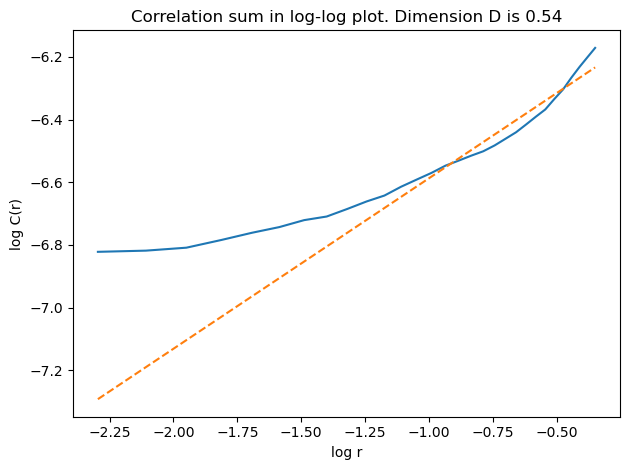

In [58]:
def fit(t, c, l):
    return (c+l*t)

# plot the trend of C(r)
plt.figure(8)
C_r,r_vals=grassberg_procaccia(X_matr,np.std(xs))
pars, covm =curve_fit(fit,np.log(r_vals[10:]),np.log(C_r[10:]), absolute_sigma=False)

print('best fit parameters',*pars)
print('errors',np.sqrt(covm.diagonal()))

plt.errorbar(np.log(r_vals),np.log(C_r))
#plt.plot(np.log(r_vals),np.log(C_r)[0]-1.91*np.log(r_vals)[0]+1.91*np.log(r_vals),'--')
plt.errorbar(np.log(r_vals),fit(np.log(r_vals),*pars),linestyle='--')
plt.xlabel("log r")
plt.ylabel("log C(r)")
plt.title("Correlation sum in log-log plot. Dimension D is "+str(round(pars[1],2)))
plt.tight_layout()
plt.savefig("correlation_dim.png",dpi=300)
plt.show()